Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 49ms/step - loss: 0.0308 - val_loss: 0.3874
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 36s 47ms/step - loss: 0.0647 - val_loss: 0.0209
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 34s 45ms/step - loss: 0.0079 - val_loss: 0.0031
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - loss: 0.0080 - val_loss: 0.0236
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 43ms/step - loss: 0.0305 - val_loss: 0.1179
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - loss: 0.0447 - val_loss: 0.0088
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - los

760/760 [==============================] - 29s 38ms/step - loss: 0.0059 - val_loss: 0.0041
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0053 - val_loss: 0.0035
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 39ms/step - loss: 0.0049 - val_loss: 0.0031
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 39ms/step - loss: 0.0045 - val_loss: 0.0020
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 39ms/step - loss: 0.0052 - val_loss: 0.0013
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 39ms/step - loss: 0.0058 - val_loss: 0.0039
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0050 - val_loss: 0.0036
Train on 760 samples, valid

760/760 [==============================] - 29s 39ms/step - loss: 0.0036 - val_loss: 7.2238e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0037 - val_loss: 9.7839e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0037 - val_loss: 7.9496e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 39ms/step - loss: 0.0039 - val_loss: 0.0015
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 39ms/step - loss: 0.0033 - val_loss: 2.3634e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0036 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 39ms/step - loss: 0.0041 - val_loss: 8.7644e-04
Train o

760/760 [==============================] - 28s 37ms/step - loss: 0.0035 - val_loss: 1.4666e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0029 - val_loss: 8.1559e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0031 - val_loss: 5.9473e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0034 - val_loss: 2.5359e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0032 - val_loss: 3.4077e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0032 - val_loss: 5.3456e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 28s 37ms/step - loss: 0.0030 - val_loss: 3.9956e-04

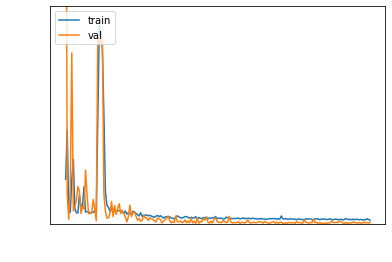

In [1]:
import time_series_numerical_predictor as predictor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = predictor.create_dataset(train, look_back)
x_val, y_val = predictor.create_dataset(val, look_back)
x_test, y_test = predictor.create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
from time_series_numerical_predictor import CustomHistory
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

predictor.show_model_learning_process(custom_hist.train_loss, custom_hist.val_loss)

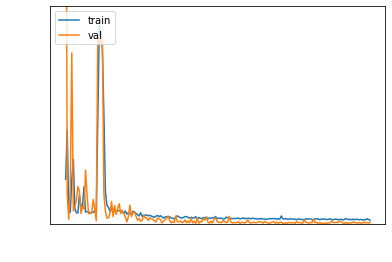

Train Score:  0.0013335451308408987
Validataion Score:  0.0012431669685109448
Test Score:  0.0012431669685109448


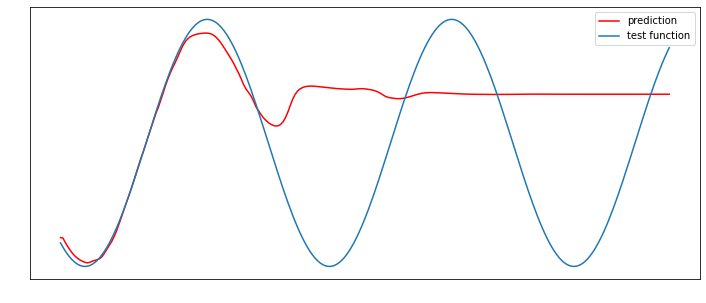

In [2]:
# 학습 과정 출력
predictor.show_model_learning_process(custom_hist.train_loss, custom_hist.val_loss)

# 모델 평가
predictor.evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, batch_size=1)

# 모델 사용
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

predictor.print_used_model(y_test, look_ahead, predictions)